# Data Exploration Exercise
---
This is an open-ended exercise to explore a given data set.

The data is taken from the [OECD Better Life Index](https://stats.oecd.org/Index.aspx?DataSetCode=BLI) - it only covers OECD countries, so when thinking about the results of your analysis, bear in mind that this excludes a lot of the world's population!

In [2]:
import pandas as pd
bli = pd.read_csv("BLI2.csv")
bli.sample(20)

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
2095,IRL,Ireland,WL_TNOW,Time devoted to leisure and personal care,Total,HOUR,14.54
333,ITA,Italy,IW_HNFW,Household net wealth,Total,USD,295020.00
1987,GRC,Greece,WL_EWLH,Employees working very long hours,Total,PC,4.50
1957,MEX,Mexico,PS_REPH,Homicide rate,Women,RATIO,5.50
2278,CRI,Costa Rica,SC_SNTWS,Quality of support network,Low,PC,85.00
210,EST,Estonia,PS_FSAFEN,Feeling safe walking alone at night,Men,PC,90.00
2046,LVA,Latvia,WL_EWLH,Employees working very long hours,Men,PC,2.40
441,KOR,Korea,JE_EMPL,Employment rate,Women,PC,57.00
1937,RUS,Russia,PS_REPH,Homicide rate,Men,RATIO,7.70
164,ESP,Spain,PS_FSAFEN,Feeling safe walking alone at night,Total,PC,80.00


In [21]:
bli[bli['Indicator'] == == "Life "Life satisfaction"]['Inequality'].unique() satisfaction"]['Inequality'].unique()

TypeError: 'method' object is not subscriptable

The data in the file is already in a tidy form, though the website linked above shows a more concise view of the data, which you may find helpful.

---
### Task 1
Do men and women report the same degree of life satisfaction?

*Hint*: Start by making a list of the available values for 'Indicator'.

In [19]:
bli['Indicator'].unique()
f_data = bli.query('Indicator == "Life satisfaction" and Inequality == "Women"')
m_data = bli.query('Indicator == "Life satisfaction" and Inequality == "Men"')

f_mean = f_data['Value'].mean()
m_mean = m_data['Value'].mean()
print(f"Mean satisfaction values... men: {m_mean:.2f}, women: {f_mean:.2f}")

f_median = f_data['Value'].median()
m_median = m_data['Value'].median()
print(f"Median satisfaction values... men: {m_median:.2f}, women: {f_median:.2f}")



Mean satisfaction values... men: 6.58, women: 6.63
Median satisfaction values... men: 6.60, women: 6.60


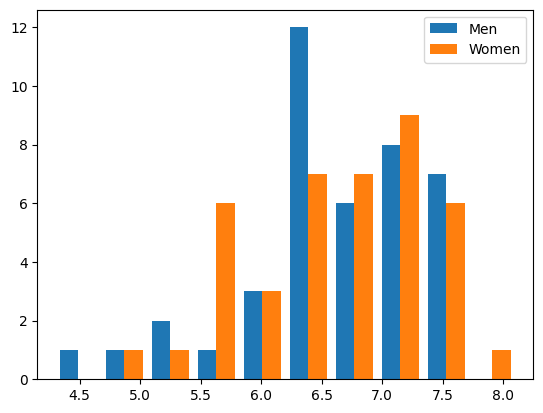

TtestResult(statistic=np.float64(-1.004681192451847), pvalue=np.float64(0.321089650106405), df=np.int64(40))

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

df = bli.query('Indicator == "Life satisfaction" and ( Inequality == "Women" or Inequality == "Men")')
piv = df.pivot(index='Country', columns='Inequality', values='Value').dropna()

# H0: mean of difference (men-women) = 0
# H1: mean is not 0
# alpha = 0.05

# piv.plot(kind='bar', figsize=(15, 5))
plt.hist([piv['Men'], piv['Women']], label=['Men', 'Women'])
plt.legend()
plt.show()

ttest_rel(piv['Men'], piv['Women'])

---
### Task 2
Is happiness related to geographical latitude?

We have some information on the overall 'life satisfaction' of each country:

In [37]:
life_sat = bli.query("Indicator == 'Life satisfaction' and Inequality == 'Total'")
life_sat.head()

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
1676,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1
1677,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2
1678,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8
1679,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0
1680,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9


We also have some information about the latitude of each country (in the *countries* table). 

In [38]:
countries = pd.read_excel("data_geographies_v1.xlsx", 
                          sheet_name = "list-of-countries-etc")
countries.head()                        

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


In [45]:
# I have fewer rows in the life_sat dataframe than in the countries dataframe.
print(len(life_sat))
print(len(countries))

41
197


Can we combine these somehow to answer this question?

How do we work with data that are held in two different DataFrames? It will be tricky at the moment, but fortunately pandas has some more tools to help us!

### Joining tables

We will start with the *life_sat* DataFrame (the "left-hand" table) and add the 'Latitude' column from *countries*. To do this, we need to `join()` the two tables together.

Importantly, we **cannot** assume that the countries are listed in the same order, or even that both tables contain the same set of countries. We need to identify a *key*, that is, some information that exists in both tables, that we can use to "look up" the correct row from *countries* (the "right-hand" table).

We could use the country name, but this might be recorded differently in the two tables. The three-letter 'LOCATION/geo' code is unique for each country, so this is the best choice for these two tables.

To join tables in pandas, we make these *key* columns the index of both the left and right tables:

In [64]:
# make a copy of the table
left = life_sat.copy()

# make a new column for 'geo'
# i.e. LOCATION but in lower case to match the other table
left['geo'] = left['LOCATION'].str.lower()

# move the 'geo' column to the index
left = left.set_index('geo')
# left = left.set_index('Country')
# left.reset_index(inplace=True)
left.head()

,geo,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value
0,aus,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1
1,aut,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2
2,bel,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8
3,can,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0
4,cze,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9


In [40]:
# make the right-hand table
right = countries.set_index('geo')

# keep only the Latitude column
right = right[['Latitude']]  
right.head()

,Latitude
geo,
afg,33.00000
alb,41.00000
dza,28.00000
and,42.50779
ago,-12.50000


Now we can join them with the `join()` method!

In [56]:
joined = left.join(right)
joined.head()
# print(len(joined))

,LOCATION,Country,INDICATOR,Indicator,Inequality,Unit Code,Value,Latitude
geo,,,,,,,,
aus,AUS,Australia,SW_LIFS,Life satisfaction,Total,AVSCORE,7.1,-25.00000
aut,AUT,Austria,SW_LIFS,Life satisfaction,Total,AVSCORE,7.2,47.33333
bel,BEL,Belgium,SW_LIFS,Life satisfaction,Total,AVSCORE,6.8,50.75000
can,CAN,Canada,SW_LIFS,Life satisfaction,Total,AVSCORE,7.0,60.10867
cze,CZE,Czech Republic,SW_LIFS,Life satisfaction,Total,AVSCORE,6.9,49.75000


This is the table we need to proceed with the analysis.

`join()` is just one of several pandas methods for working with **relational data** (i.e. data held in more than one table).

If needed, you can move the the current index column back into the body of the DataFrame using the method [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index). We already have the LOCATION column in the table, so we don't need do do this now.


Use the *joined* table to investigate the relationship between life satisfaction and latitude.

Correlation between latitude and life satisfaction: 0.31


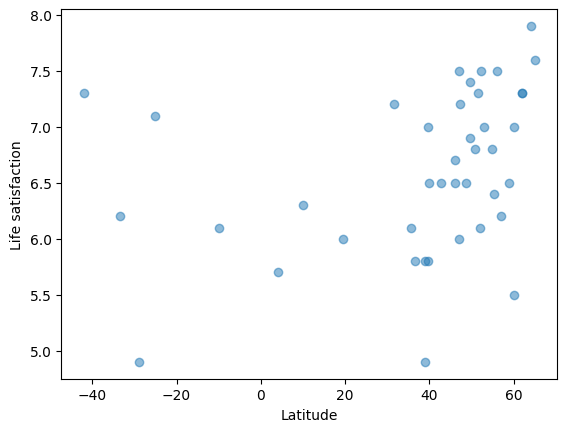

In [73]:
plt.scatter(joined['Latitude'], joined['Value'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Life satisfaction')

# can't really conclude very much on this single set of data but...
# ... is there a sort of U shape here?
correlation = joined['Latitude'].corr(joined['Value'])
print(f"Correlation between latitude and life satisfaction: {correlation:.2f}")

r = : 0.47, p = 0.0021


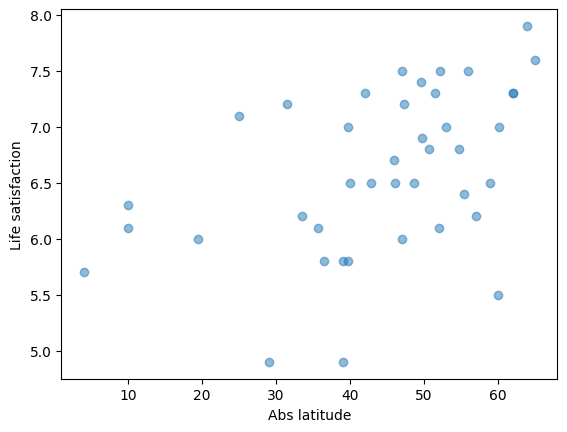

In [77]:
from scipy.stats import pearsonr

joined['Abs_Lat'] = joined['Latitude'].abs()

plt.scatter(joined['Abs_Lat'], joined['Value'], alpha=0.5)
plt.xlabel('Abs latitude')
plt.ylabel('Life satisfaction')

# can't really conclude very much on this single set of data but...
r, pval = pearsonr(joined['Abs_Lat'], joined['Value'])
# correlation is 47%, p is 0.0021 which means chances that there is no correlation is 0.21%
print(f"r = : {r:.2f}, p = {pval:.4f}")

---
### Any other ideas?

Make a note of any other summary statistics, visualisations and hypotheses that you would be interested to explore in this dataset.

If there is a relationship with happiness and latitude, are there other factors involved too?
For instance, does GDP per cap, level of education, free time etc

OR... 